## Run a sim

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rebound
import numpy as np

sim = rebound.Simulation()
sim.integrator = "trace"
sim.dt = 0.001
sim.save_to_file('hd_b.bin', interval=0.01,delete_file=True) # save as binary file

sol_mass = (2 * np.pi)**2 

jup_gm = 1.27E17 
jup_mass = (jup_gm / (1.33E20)) * sol_mass

star_mass = 0.798 * sol_mass
b_mass = 0.0179 * jup_mass
c_mass = 0.020 * jup_mass
d_mass = 0.02681 * jup_mass
e_mass = 0.012 * jup_mass
f_mass = 0.0159 * jup_mass
g_mass = 0.026 * jup_mass


# add particles to the simulation

sim.add(m = star_mass, hash = 'HD-110067')
sim.add(m = b_mass, a = 0.07930, inc = (90 - 89.061) * (np.pi/180), hash = 'HD-110067b')
sim.add(m = c_mass, a = 0.1039, inc = (90 - 89.687) * (np.pi/180), hash = 'HD-110067c')
sim.add(m = d_mass, a = 0.1362, inc = (90 - 89.248) * (np.pi/180), hash = 'HD-110067d')
sim.add(m = e_mass, a = 0.1785, inc = (90 - 89.867) * (np.pi/180), hash = 'HD-110067e')
sim.add(m = f_mass, a = 0.2163, inc = (90 - 89.673) * (np.pi/180), hash = 'HD-110067f')
sim.add(m = g_mass, a = 0.2621, inc = (90 - 89.729) * (np.pi/180), hash = 'HD-110067g')

# add trojans
ps = sim.particles
os = sim.orbits()

#change for each sim
a_start = ps['HD-110067b'].a
a_end = a_start * (1 + (b_mass / (3 * star_mass)) ** (1/3))

sem_maj_ax = np.linspace(a_start, a_end, 20)

omega = os[0].omega + (np.pi / 3)
inc = os[0].inc
Omega = os[0].Omega
f = os[0].f

for i in range(20):
    a = sem_maj_ax[i]
    hash_val = 'Trojan_110067b_{}'.format(i)
    
    sim.add(a = a, inc = inc, omega = omega, Omega = Omega, f = f, hash = hash_val)

sim.N_active = 7 # number of active (non-massless) particles, sun and six planets

Nout = 10000 # number of points to display
tmax = 100 # let the simulation run for 10^5 years
Nplanets = 6

a = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.orbits()
    for j in range(Nplanets):
        a[j][i] = os[j].a 
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f

## Load/plot sim

### mean longitude

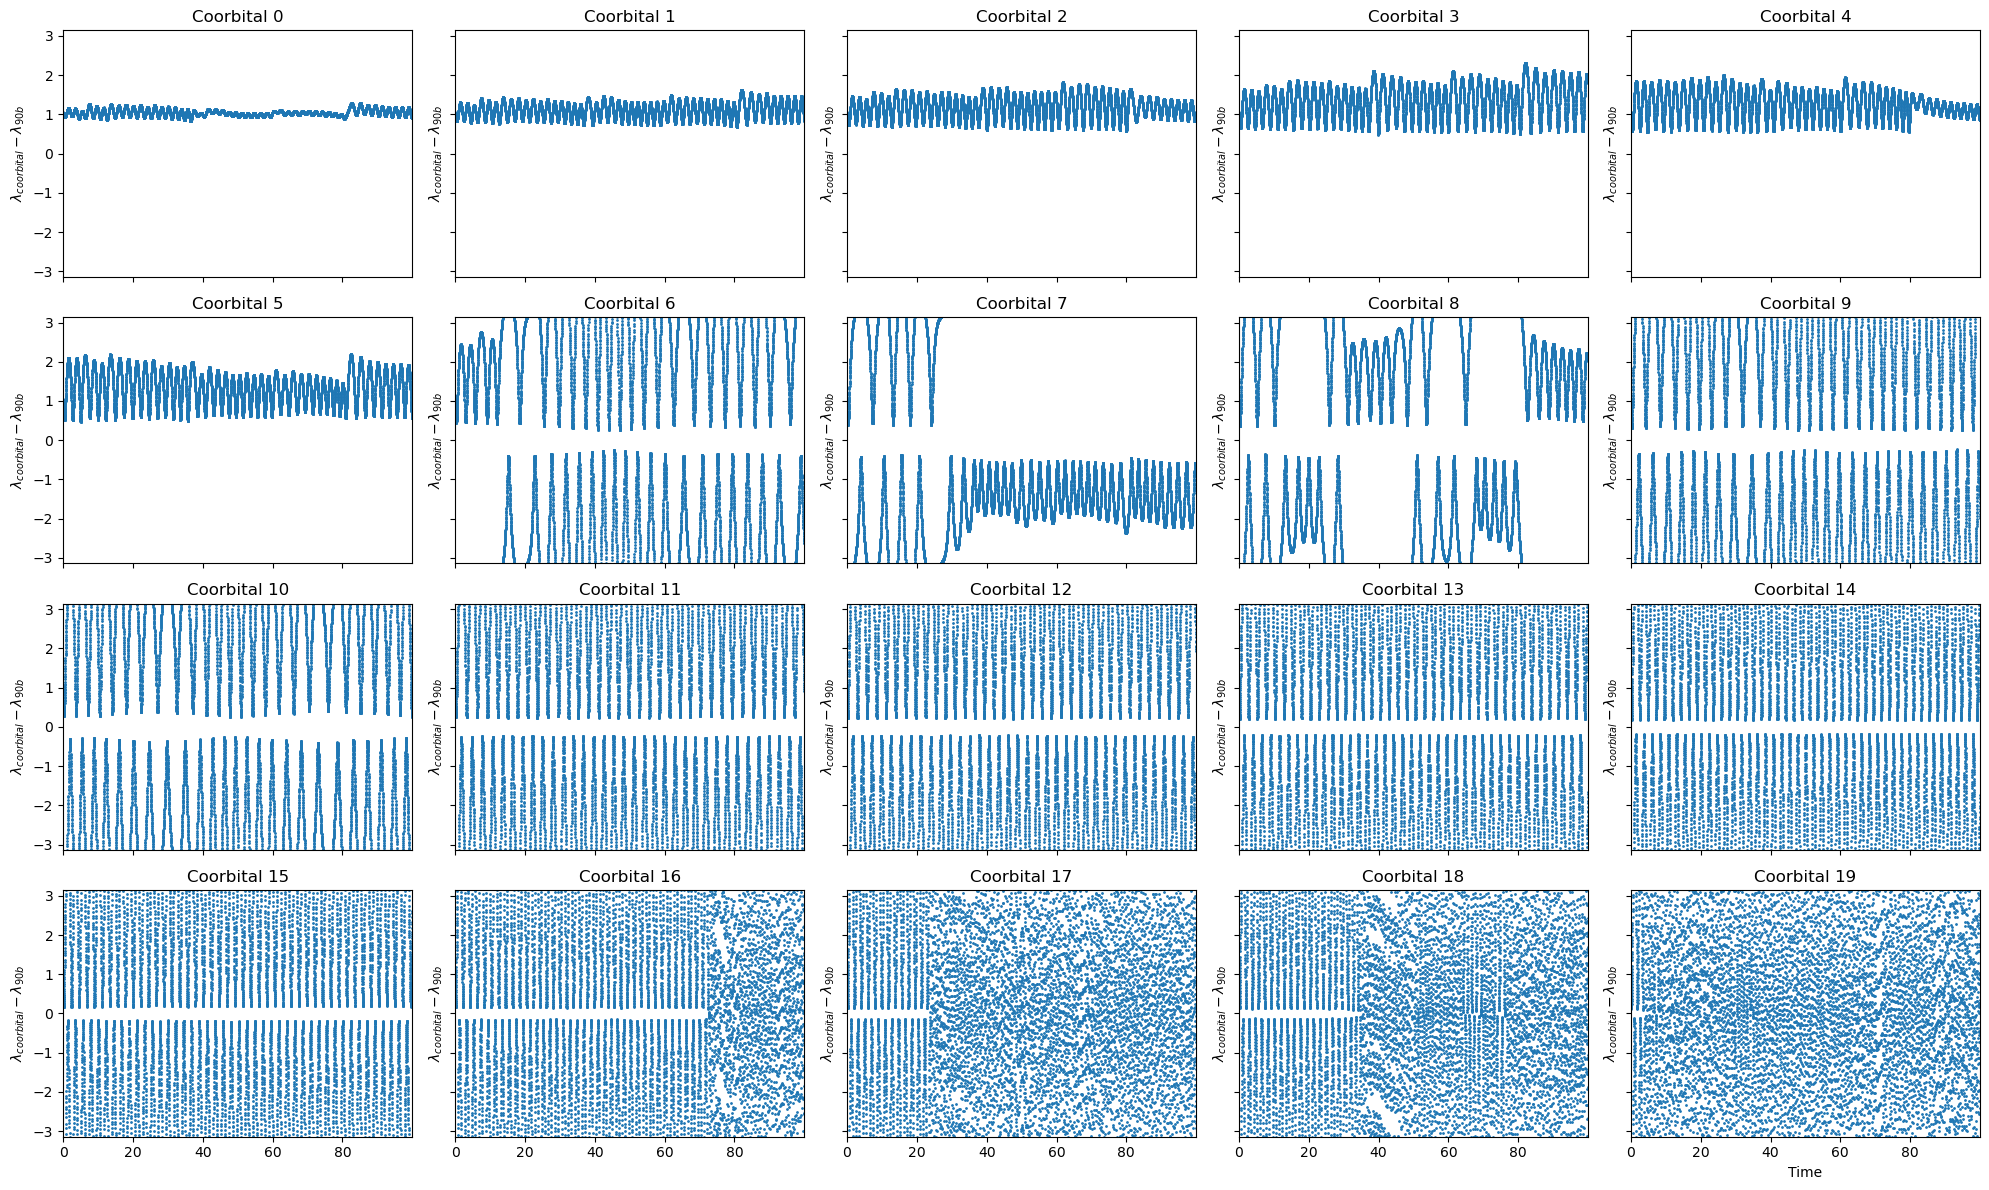

In [5]:
# Load the simulation archive
sa = rebound.Simulationarchive("hd_b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize a list to hold the mean longitude differences
mean_longitude_differences = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    mean_longitudes = []

    # Extract mean longitudes for particles after the first 9 (sun and planets)
    for j in range(7, 27):
        particle = sim.particles[j]
        mean_longitudes.append(particle.l)

    # Calculate the mean longitude of Kepler-90b (assumed to be the second particle, index 1)
    kepler_90b = sim.particles[1]
    kepler_90b_mean_longitude = kepler_90b.l

    # Calculate the differences and store them
    differences = np.array(mean_longitudes) - kepler_90b_mean_longitude
    mean_longitude_differences.append(differences)

# Convert the list of arrays to a 2D array for plotting
mean_longitude_differences = np.array(mean_longitude_differences)

# Determine the number of particles
n_particles = mean_longitude_differences.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_particles + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits
ymax = np.pi
ymin = -np.pi
xmin = tmin
xmax = tmax

# Plot each particle's mean longitude difference in a separate subplot
for i in range(n_particles):
    axs[i].plot(times, mean_longitude_differences[:, i], marker='o', linestyle='None', markersize=1)
    axs[i].set_ylabel(f'$\lambda_{{coorbital}} - \lambda_{{90b}}$')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(xmin, xmax)

# Remove empty subplots
for i in range(n_particles, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('110067b_l.png')

# Show the plot
plt.show()

### semi-major axis

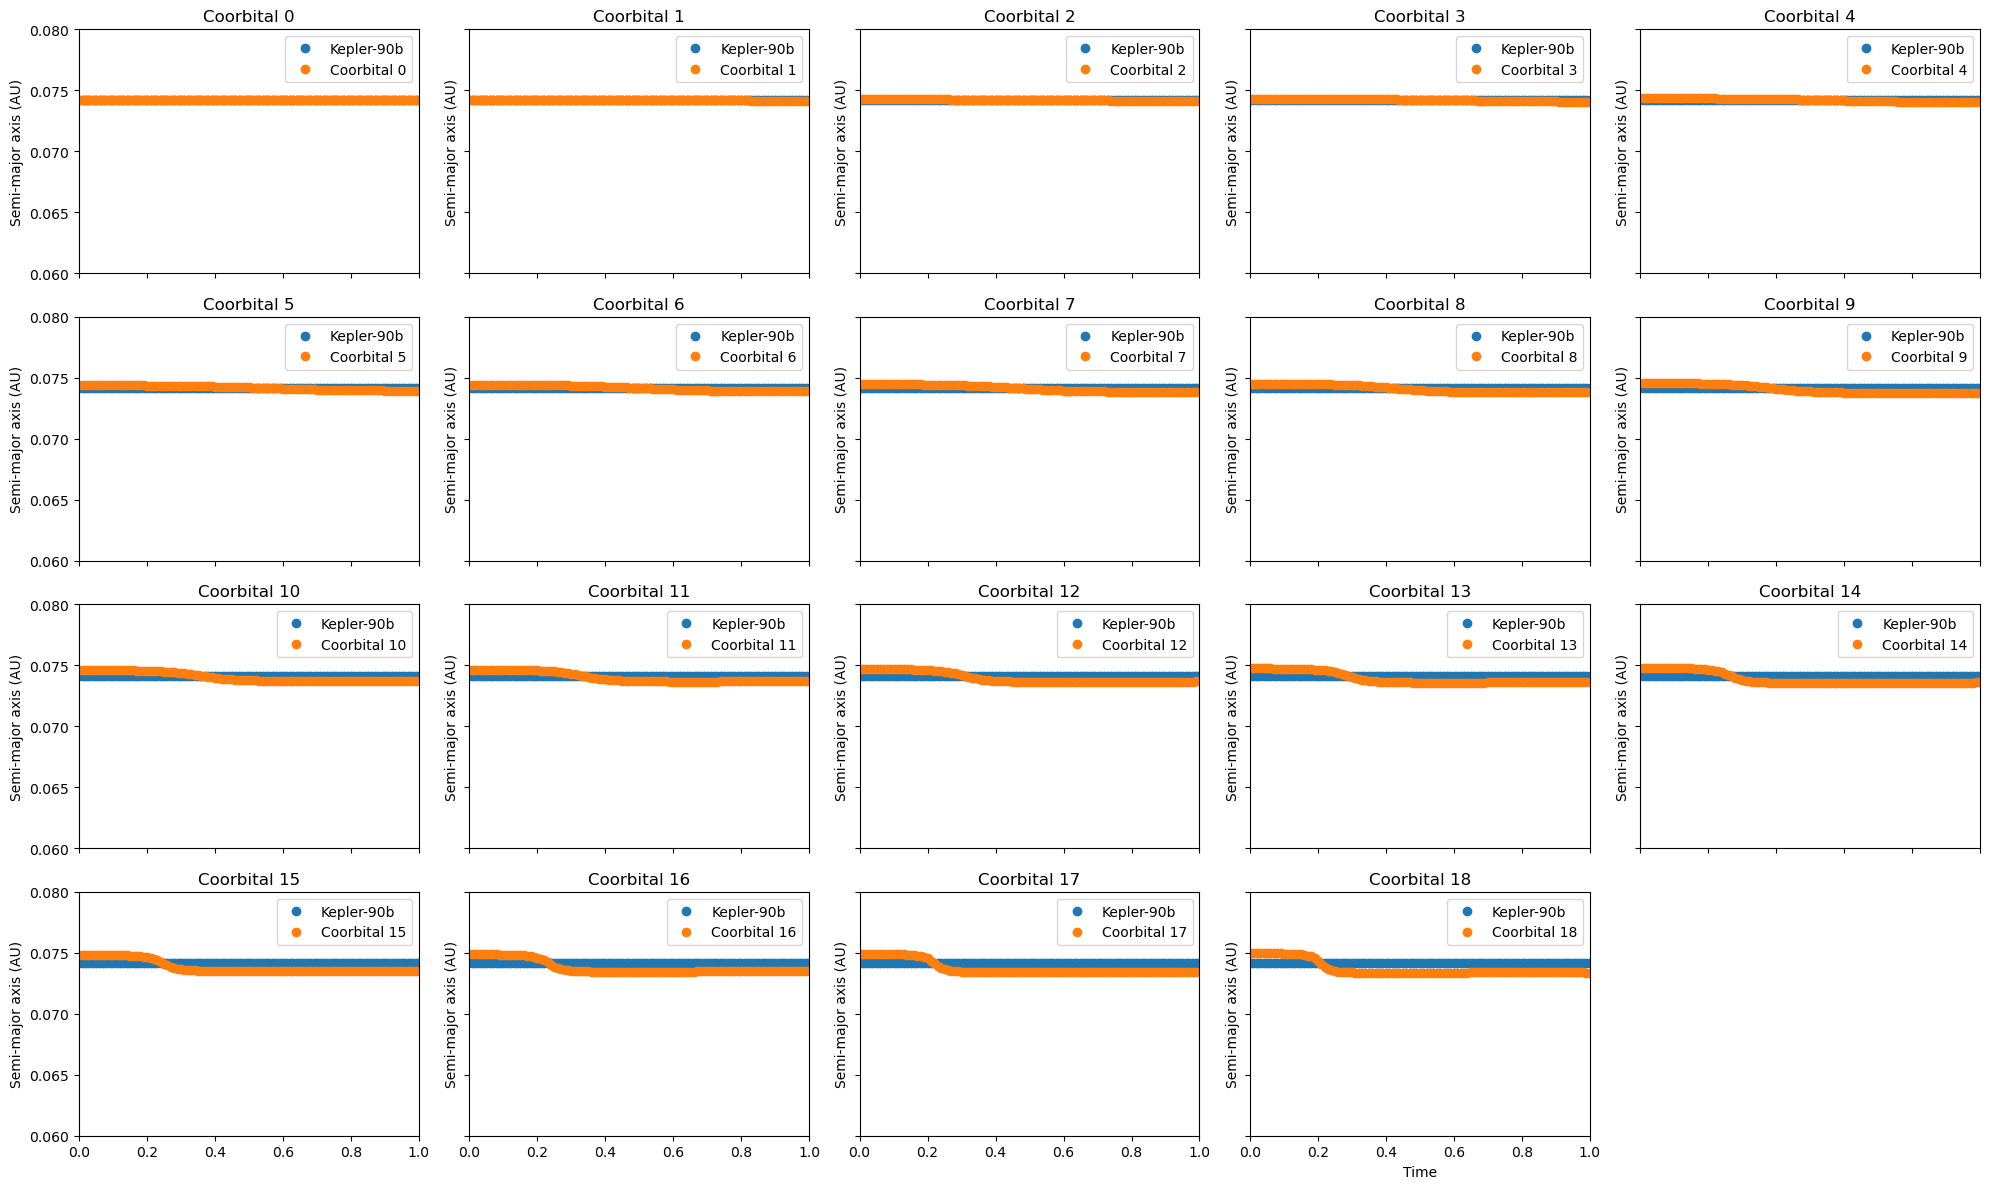

In [3]:
## Load the simulation archive
sa = rebound.Simulationarchive("hd_110067b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize lists to hold the semi-major axes of Kepler-90b and coorbitals
kepler_90b_axes = []
coorbital_axes = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    
    # Extract Kepler-90b's semi-major axis (assumed to be the second particle, index 1)
    kepler_90b = sim.particles[1]
    kepler_90b_axes.append(kepler_90b.a)
    
    # Extract semi-major axes for particles after the first 9 (sun and planets)
    coorbital_axes_snapshot = []
    for j in range(2, 21):
        particle = sim.particles[j]
        coorbital_axes_snapshot.append(particle.a)
    
    # Store the semi-major axes for this snapshot
    coorbital_axes.append(coorbital_axes_snapshot)

# Convert lists to arrays for plotting
kepler_90b_axes = np.array(kepler_90b_axes)
coorbital_axes = np.array(coorbital_axes)

# Determine the number of coorbital particles
n_coorbitals = coorbital_axes.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_coorbitals + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits based on semi-major axis range
ymax = np.max([np.max(kepler_90b_axes), np.max(coorbital_axes)])
ymin = np.min([np.min(kepler_90b_axes), np.min(coorbital_axes)])
xmin = tmin
xmax = tmax

# Plot each coorbital's semi-major axis along with Kepler-90b's semi-major axis in separate subplots
for i in range(n_coorbitals):
    axs[i].plot(times, kepler_90b_axes, label='Kepler-90b', marker='o', linestyle='None')
    axs[i].plot(times, coorbital_axes[:, i], label=f'Coorbital {i}', marker='o', linestyle='None')
    axs[i].set_ylabel('Semi-major axis (AU)')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(0.06, 0.08)
    axs[i].set_xlim(0, 1)
    axs[i].legend()

# Remove empty subplots
for i in range(n_coorbitals, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot (optional)
plt.savefig('90b_a.png')

# Show the plot
plt.show()

### eccentricity

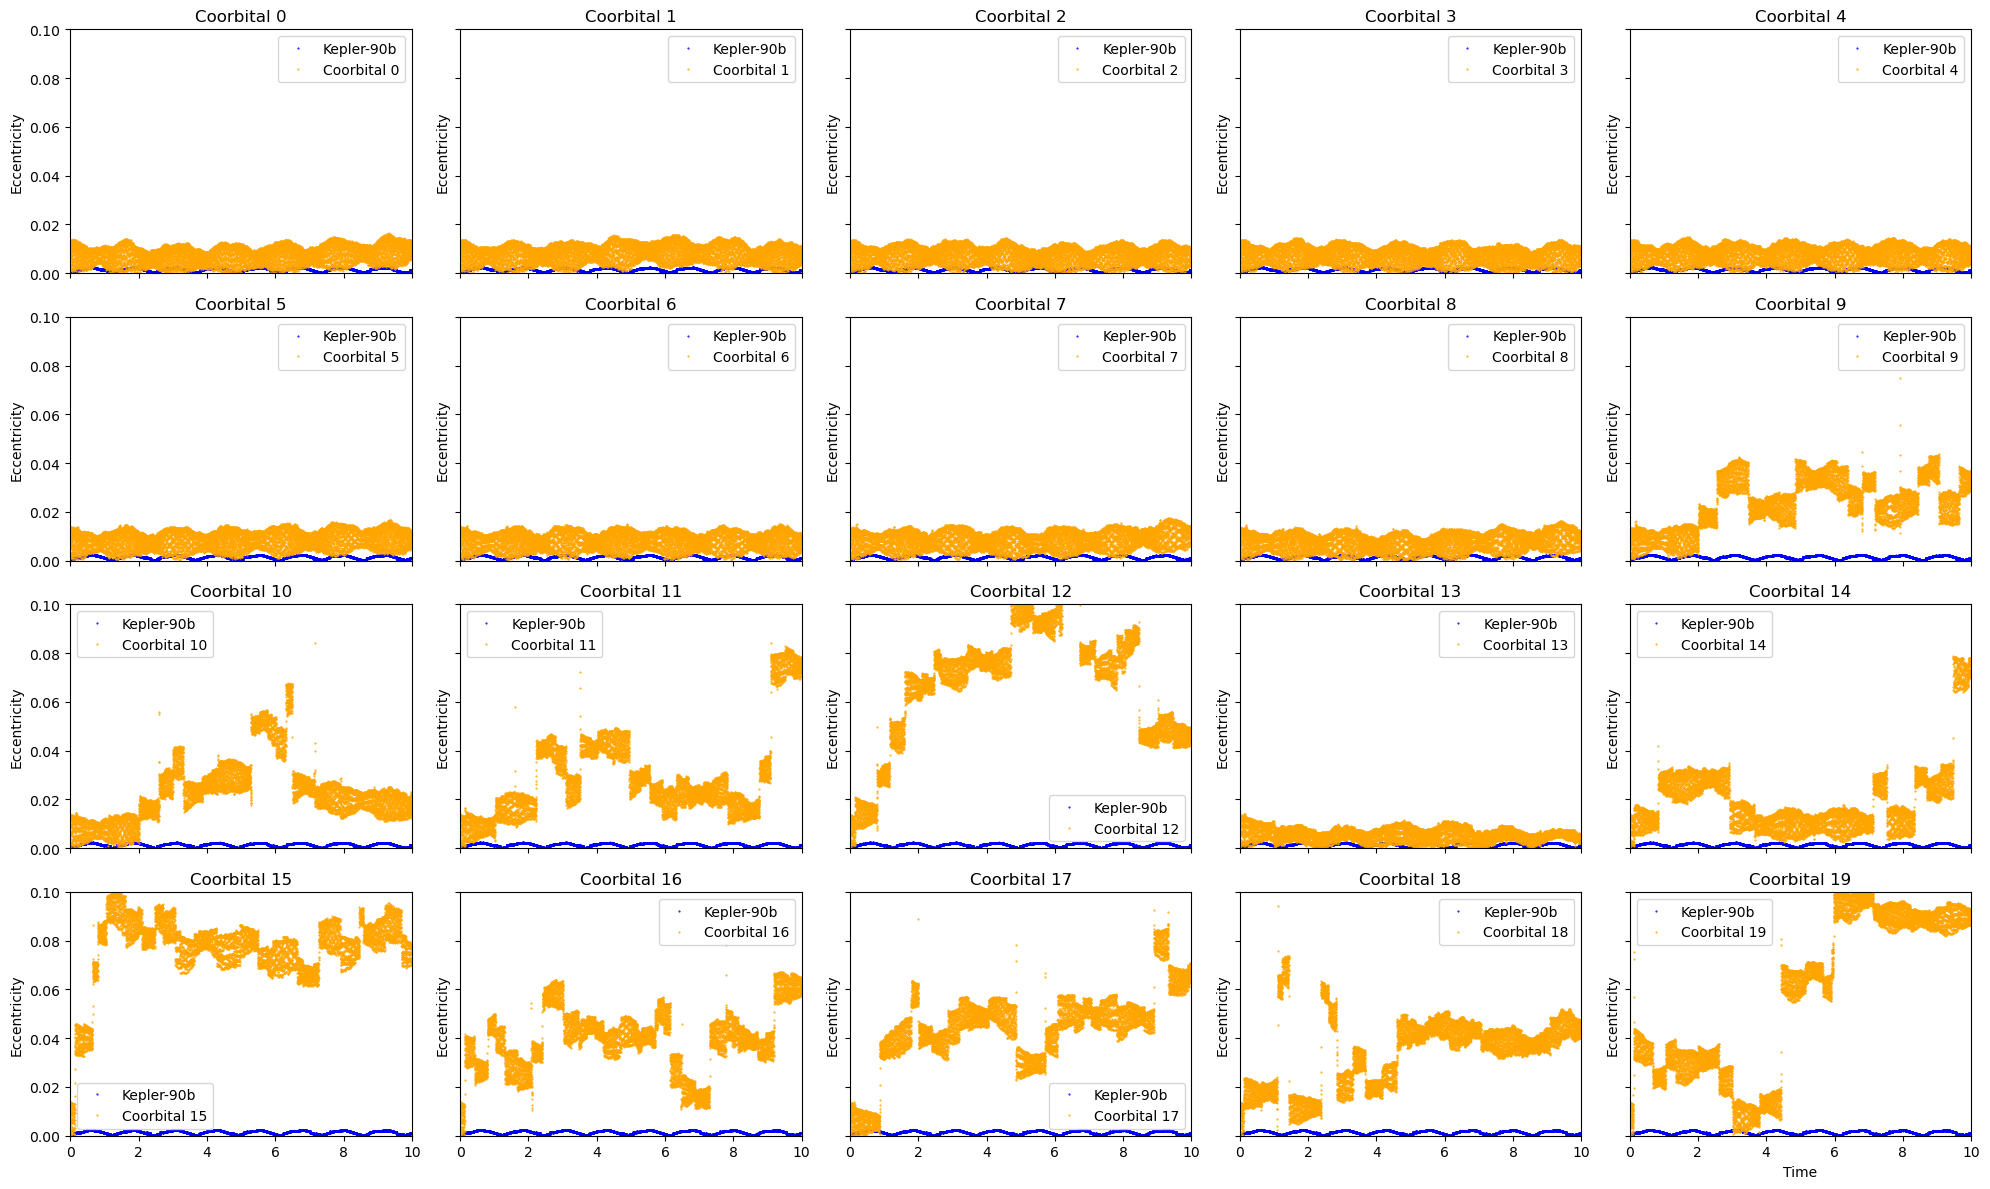

In [7]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

# Load the simulation archive
sa = rebound.Simulationarchive("tester.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize lists to hold the eccentricities of Kepler-90b and coorbitals
kepler_90b_ecc = []
coorbital_ecc = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    
    # Extract Kepler-90b's eccentricity (assumed to be the second particle, index 1)
    kepler_90b = sim.particles[1]
    kepler_90b_ecc.append(kepler_90b.e)
    
    # Extract eccentricities for particles after the first 9 (sun and planets)
    coorbital_ecc_snapshot = []
    for j in range(9, sim.N):
        particle = sim.particles[j]
        coorbital_ecc_snapshot.append(particle.e)
    
    # Store the eccentricities for this snapshot
    coorbital_ecc.append(coorbital_ecc_snapshot)

# Convert lists to arrays for plotting
kepler_90b_ecc = np.array(kepler_90b_ecc)
coorbital_ecc = np.array(coorbital_ecc)

# Determine the number of coorbital particles
n_coorbitals = coorbital_ecc.shape[1]

# Calculate the grid size for subplots
n_cols = 5
n_rows = (n_coorbitals + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Set y-axis limits based on eccentricity range
ymax = np.max([np.max(kepler_90b_ecc), np.max(coorbital_ecc)])
ymin = np.min([np.min(kepler_90b_ecc), np.min(coorbital_ecc)])
xmin = tmin
xmax = tmax

# Plot each coorbital's eccentricity along with Kepler-90b's eccentricity in separate subplots
for i in range(n_coorbitals):
    axs[i].plot(times, kepler_90b_ecc, label='Kepler-90b', marker='o', markersize=.5, linestyle='None', color='blue')
    axs[i].plot(times, coorbital_ecc[:, i], label=f'Coorbital {i}', marker='o', markersize=.5, linestyle='None', color='orange')
    axs[i].set_ylabel('Eccentricity')
    axs[i].set_title(f'Coorbital {i}')
    axs[i].set_ylim(0, .1)
    axs[i].set_xlim(0, 10)
    axs[i].legend()

# Remove empty subplots
for i in range(n_coorbitals, len(axs)):
    fig.delaxes(axs[i])

# Set common x-axis label
plt.xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot (optional)
plt.savefig('90b_ecc.png')

# Show the plot
plt.show()

## Planets Only - Plots of a, e, & inc

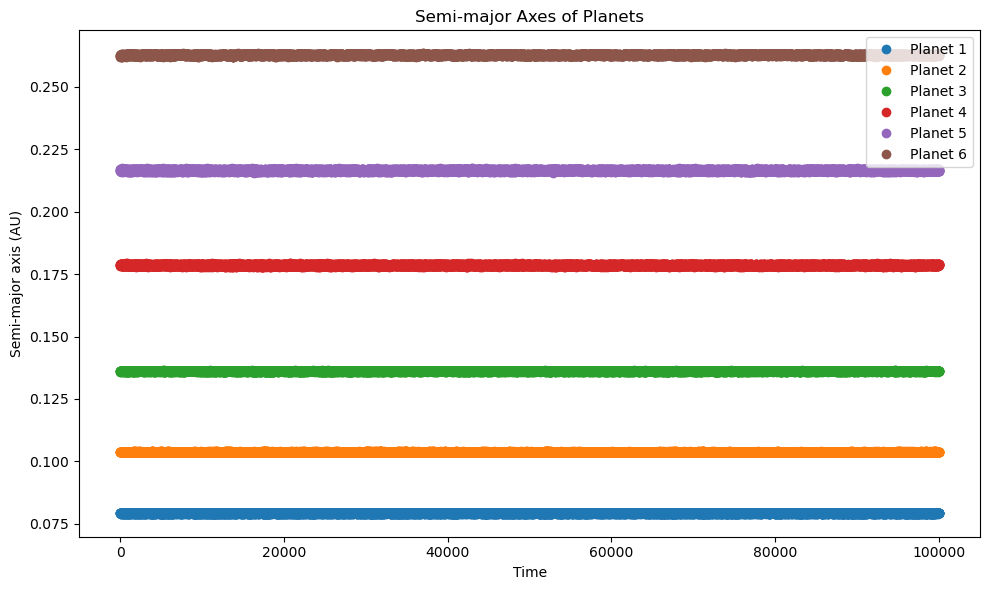

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

# Load the simulation archive
sa = rebound.Simulationarchive("hd_110067b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize lists to hold the semi-major axes of the planets
planet1_axes = []
planet2_axes = []
planet3_axes = []
planet4_axes = []
planet5_axes = []
planet6_axes = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    
    # Extract semi-major axes for planets with indices 1-6
    planet1_axes.append(sim.particles[1].a)
    planet2_axes.append(sim.particles[2].a)
    planet3_axes.append(sim.particles[3].a)
    planet4_axes.append(sim.particles[4].a)
    planet5_axes.append(sim.particles[5].a)
    planet6_axes.append(sim.particles[6].a)

# Convert lists to arrays for plotting
planet1_axes = np.array(planet1_axes)
planet2_axes = np.array(planet2_axes)
planet3_axes = np.array(planet3_axes)
planet4_axes = np.array(planet4_axes)
planet5_axes = np.array(planet5_axes)
planet6_axes = np.array(planet6_axes)

# Plot each planet's semi-major axis in a single plot
plt.figure(figsize=(10, 6))
plt.plot(times, planet1_axes, label='Planet 1', marker='o', linestyle='None')
plt.plot(times, planet2_axes, label='Planet 2', marker='o', linestyle='None')
plt.plot(times, planet3_axes, label='Planet 3', marker='o', linestyle='None')
plt.plot(times, planet4_axes, label='Planet 4', marker='o', linestyle='None')
plt.plot(times, planet5_axes, label='Planet 5', marker='o', linestyle='None')
plt.plot(times, planet6_axes, label='Planet 6', marker='o', linestyle='None')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Semi-major axis (AU)')
plt.title('Semi-major Axes of Planets')
plt.legend()
plt.tight_layout()

# Save the plot (optional)
# plt.savefig('planets_semi_major_axes.png')

# Show the plot
plt.show()

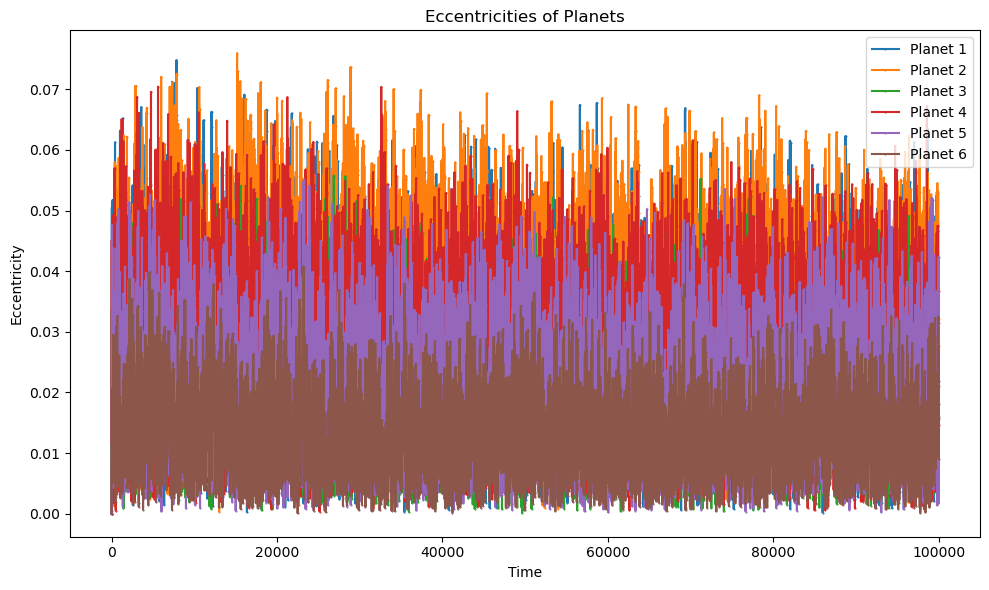

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

# Load the simulation archive
sa = rebound.Simulationarchive("hd_110067b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize lists to hold the eccentricities of the planets
planet1_ecc = []
planet2_ecc = []
planet3_ecc = []
planet4_ecc = []
planet5_ecc = []
planet6_ecc = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    
    # Extract eccentricities for planets with indices 1-6
    planet1_ecc.append(sim.particles[1].e)
    planet2_ecc.append(sim.particles[2].e)
    planet3_ecc.append(sim.particles[3].e)
    planet4_ecc.append(sim.particles[4].e)
    planet5_ecc.append(sim.particles[5].e)
    planet6_ecc.append(sim.particles[6].e)

# Convert lists to arrays for plotting
planet1_ecc = np.array(planet1_ecc)
planet2_ecc = np.array(planet2_ecc)
planet3_ecc = np.array(planet3_ecc)
planet4_ecc = np.array(planet4_ecc)
planet5_ecc = np.array(planet5_ecc)
planet6_ecc = np.array(planet6_ecc)

# Plot each planet's eccentricity in a single plot
plt.figure(figsize=(10, 6))
plt.plot(times, planet1_ecc, label='Planet 1', marker='o', markersize=.5) #, linestyle='None')
plt.plot(times, planet2_ecc, label='Planet 2', marker='o', markersize=.5) #, linestyle='None')
plt.plot(times, planet3_ecc, label='Planet 3', marker='o', markersize=.5) #, linestyle='None')
plt.plot(times, planet4_ecc, label='Planet 4', marker='o', markersize=.5) #, linestyle='None')
plt.plot(times, planet5_ecc, label='Planet 5', marker='o', markersize=.5) #, linestyle='None')
plt.plot(times, planet6_ecc, label='Planet 6', marker='o', markersize=.5) #, linestyle='None')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Eccentricity')
plt.title('Eccentricities of Planets')
plt.legend()
plt.tight_layout()

# Save the plot (optional)
# plt.savefig('planets_eccentricity.png')

# Show the plot
plt.show()


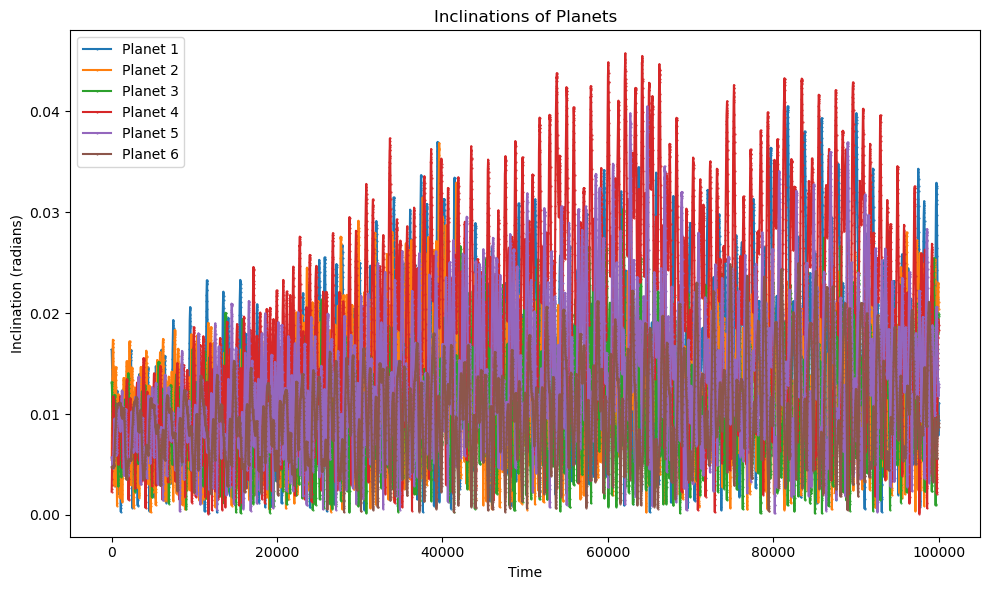

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

# Load the simulation archive
sa = rebound.Simulationarchive("hd_110067b.bin")

# Get the time range and number of snapshots
tmax = sa.tmax
tmin = sa.tmin
nshots = len(sa)

# Generate an array of times corresponding to the snapshots
times = np.linspace(tmin, tmax, nshots)

# Initialize lists to hold the inclinations of the planets
planet1_inc = []
planet2_inc = []
planet3_inc = []
planet4_inc = []
planet5_inc = []
planet6_inc = []

# Iterate over each snapshot
for i in range(nshots):
    sim = sa[i]  # Load the i-th snapshot
    
    # Extract inclinations for planets with indices 1-6
    planet1_inc.append(sim.particles[1].inc)
    planet2_inc.append(sim.particles[2].inc)
    planet3_inc.append(sim.particles[3].inc)
    planet4_inc.append(sim.particles[4].inc)
    planet5_inc.append(sim.particles[5].inc)
    planet6_inc.append(sim.particles[6].inc)

# Convert lists to arrays for plotting
planet1_inc = np.array(planet1_inc)
planet2_inc = np.array(planet2_inc)
planet3_inc = np.array(planet3_inc)
planet4_inc = np.array(planet4_inc)
planet5_inc = np.array(planet5_inc)
planet6_inc = np.array(planet6_inc)

# Plot each planet's inclination in a single plot
plt.figure(figsize=(10, 6))
plt.plot(times, planet1_inc, label='Planet 1', marker='o',markersize=.5) #, linestyle='None')
plt.plot(times, planet2_inc, label='Planet 2', marker='o',markersize=.5) #, linestyle='None')
plt.plot(times, planet3_inc, label='Planet 3', marker='o',markersize=.5) #, linestyle='None')
plt.plot(times, planet4_inc, label='Planet 4', marker='o',markersize=.5) #, linestyle='None')
plt.plot(times, planet5_inc, label='Planet 5', marker='o',markersize=.5) #, linestyle='None')
plt.plot(times, planet6_inc, label='Planet 6', marker='o',markersize=.5) #, linestyle='None')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Inclination (radians)')
plt.title('Inclinations of Planets')
plt.legend()
plt.tight_layout()

# Save the plot (optional)
# plt.savefig('planets_inclination.png')

# Show the plot
plt.show()


In [11]:
import rebound
import numpy as np

sa = rebound.Simulationarchive("hd_110067b.bin") # change file name

#print("Number of snapshots: %d" % len(sa))
#print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

ps = sa[0].particles
os = sa[0].orbits()
print(os)

[<rebound.Orbit instance, a=0.0793 e=0.0 inc=0.016388641676230675 Omega=0.0 omega=0.0 f=0.0>, <rebound.Orbit instance, a=0.1039 e=0.0 inc=0.005462880558765204 Omega=0.0 omega=0.0 f=0.0>, <rebound.Orbit instance, a=0.13619999999999996 e=2.457316197307815e-16 inc=0.013124875974992747 Omega=0.0 omega=3.141592653589793 f=3.141592653589793>, <rebound.Orbit instance, a=0.17850000000000005 e=3.2204452526091074e-16 inc=0.0023212879051373817 Omega=0.0 omega=0.0 f=0.0>, <rebound.Orbit instance, a=0.21629999999999996 e=1.951173827643868e-16 inc=0.005707226654022506 Omega=0.0 omega=3.141592653589793 f=3.141592653589793>, <rebound.Orbit instance, a=0.26209999999999994 e=1.1821237908491323e-16 inc=0.004729842272908357 Omega=0.0 omega=3.141592653589793 f=3.141592653589793>, <rebound.Orbit instance, a=0.07929999999999997 e=2.868356981691737e-16 inc=0.016388641676230675 Omega=0.0 omega=4.118488797843952 f=3.211894060532231>, <rebound.Orbit instance, a=0.07938036739805474 e=2.8822192517952283e-16 inc=0.